# sklearn中SVC中的参数说明与常用函数

## 1常用参数

12.decision_function_shape举例

In [38]:
x=[[1,2,3],[11,18,16],[22,27,26],[33,34,39],[3,3,9],[13,24,49]]
y=[1,1,2,3,4,3]
clf=svm.SVC(probability=True,kernel='rbf', degree=2,gamma=0.1,decision_function_shape="ovr",class_weight={1:10})
clf.fit(x,y)
print(clf.predict(np.array([[10,15,13]])))#预测的分类结果
print(clf.predict_proba(np.array([[10,15,13]])))#输出属于每一类的概率
print(clf.decision_function(np.array([[10,15,13]])))#每个点与分类边界的距离

[1]
[[0.24497194 0.23376727 0.28776336 0.23349743]]
[[ 3.18879443 -0.17267406  2.15319516  0.82678211]]


## 2常用函数

## 3例子

### 3.1 例1

In [26]:
from sklearn import svm
X = [
        [1, 0], 
        [3, 2.2],
        [2,1.5],
        [5,2.5]]
y = [0, 1, 0, 1]
clf = svm.SVC(probability=True)
clf.fit(X, y)

SVC(probability=True)

In [27]:
# 拟合后，可以使用模型来预测新值
test_x = np.array([[5, 3.2]])
print(clf.predict(test_x))
print(clf.predict_proba(test_x))


[1]
[[0.92563541 0.07436459]]


In [49]:
clf.support_vectors_

array([[1. , 0. ],
       [3. , 2.2]])

In [50]:
clf.support_vectors_[:, 1]

array([0. , 2.2])

In [17]:
clf.support_

array([0, 1])

In [20]:
clf.n_support_

array([1, 1])

### 3.2 SVM：分隔超平面的最大边距

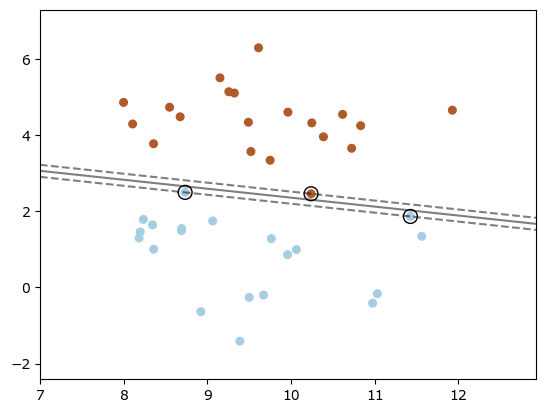

In [64]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay


# 创建40个独立的点
# make_blobs函数是为聚类产生数据集，产生一个数据集和相应的标签
X, y = make_blobs(n_samples=40, centers=2, random_state=4)

# 拟合模型，不要出于说明目的进行正则化
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0], # 支持向量的第一维
    clf.support_vectors_[:, 1], # 支持向量的第二维
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

### 3.3 非线性支持向量机

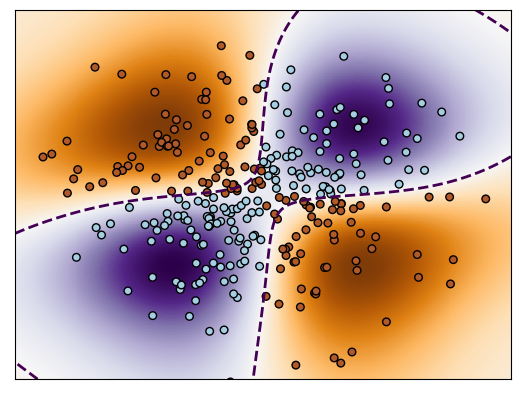

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma="auto")
clf.fit(X, Y)

# 为网格上的数据点绘制决策函数
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

### 3.4 例4

[1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0]


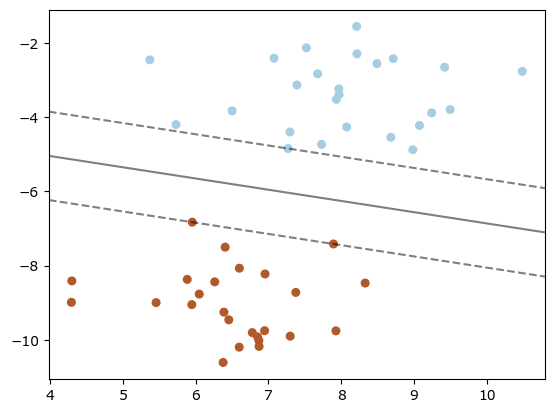

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
#这里我们创建了50个数据点，并将它们分为了2类
x,y=make_blobs(n_samples=50,centers=2,random_state=6)
print(y)
#构建一个内核为线性的支持向量机模型
clf=svm.SVC(kernel="linear",C=1000)
clf.fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y, s=30,cmap=plt.cm.Paired)
#建立图形坐标
ax=plt.gca()
xlim=ax.get_xlim()#获取数据点x坐标的最大值和最小值
ylim=ax.get_ylim()#获取数据点y坐标的最大值和最小值

#根据坐标轴生成等差数列(这里是对参数进行网格搜索)
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=clf.decision_function(xy).reshape(XX.shape)

#画出分类的边界
ax.contour(XX,YY,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=100,linewidths=1,facecolors="none")
plt.show()


### 例5

D:\dev\Anaconda3\envs\design39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


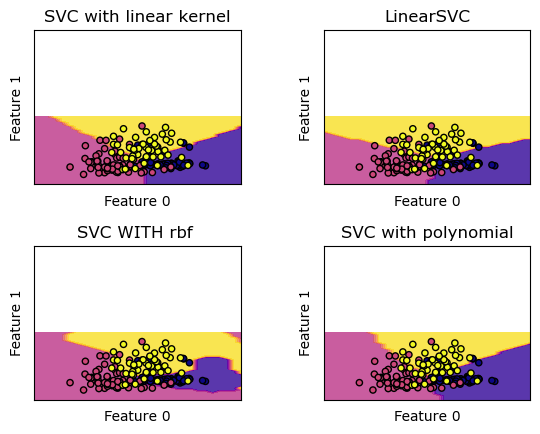

In [46]:
from sklearn.datasets import load_wine
#定义一个画图的函数
def make_meshgrid(x,y,h=0.2):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    return xx,yy
#定义一个绘制等高线的函数
def plot_contours(ax,clf,xx,yy,**param):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=ax.contourf(xx,yy,Z,**param)
    return out
wine=load_wine()
X=wine.data[:,:2]
y=wine.target
C=1.0 #SVM的正则化参数
models=(svm.SVC(kernel="linear",C=C), #L1正则化
        svm.LinearSVC(C=C), #L2正则化
        svm.SVC(kernel="rbf",gamma=0.7), #径向基 gamma为内核宽度
        svm.SVC(kernel="poly",degree=3,C=C)) #特征多项式)
models=(clf.fit(X,y) for clf in models)
#设定图例
titles=('SVC with linear kernel',"LinearSVC","SVC WITH rbf ","SVC with polynomial")
#s设定一个子图形的个数和排列方式
fig,sub=plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4,hspace=0.4)
#使用前面定义的函数进行画图
X0,X1=X[:,0],X[:,1]
xx,yy=make_meshgrid(X0,X1)
for clf,title,ax in zip(models,titles,sub.flatten()):
    plot_contours(ax,clf,xx,yy,cmap=plt.cm.plasma,alpha=0.8)
    ax.scatter(X0,X1,c=y,cmap=plt.cm.plasma,s=20,edgecolors='k')
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),xx.max())
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

### 例6

In [54]:
from sklearn.linear_model import LogisticRegression
import numpy as np
 
train_X = np.array(np.random.randint(0,10,size=30).reshape(10,3))
train_y = np.array(np.random.randint(0,2,size=10))
test_X = np.array(np.random.randint(0,10,size=12).reshape(4,3))
 
model = LogisticRegression()
model.fit(train_X,train_y)

plt.scatter(train_X, train_y)
plt.show()
print(train_X)
print(train_y)
print(model.predict(test_X))
print(model.predict_proba(test_X))

[[8 7 8]
 [7 8 1]
 [2 7 8]
 [7 3 2]
 [0 9 8]
 [5 5 7]
 [9 6 1]
 [5 4 4]
 [6 2 2]
 [0 0 0]]
[0 1 0 1 0 1 1 0 0 1]
[0 0 1 0]
[[0.8272914  0.1727086 ]
 [0.6914455  0.3085545 ]
 [0.18588408 0.81411592]
 [0.80483026 0.19516974]]


### 例7

[1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0]


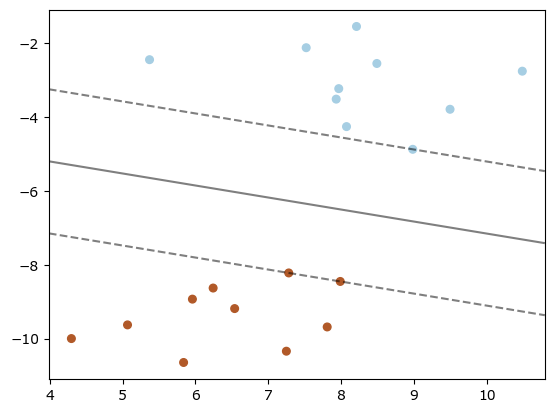

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
#这里我们创建了50个数据点，并将它们分为了2类
x,y=make_blobs(n_samples=20,centers=2,random_state=6)
print(y)
#构建一个内核为线性的支持向量机模型
clf=svm.SVC(kernel="linear",C=1000, probability=True)
clf.fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y, s=30,cmap=plt.cm.Paired)
#建立图形坐标
ax=plt.gca()
xlim=ax.get_xlim()#获取数据点x坐标的最大值和最小值
ylim=ax.get_ylim()#获取数据点y坐标的最大值和最小值

#根据坐标轴生成等差数列(这里是对参数进行网格搜索)
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=clf.decision_function(xy).reshape(XX.shape)

#画出分类的边界
ax.contour(XX,YY,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=100,linewidths=1,facecolors="none")
plt.show()

In [20]:
test_x = np.array([[5, -20],[1,2],[3,4],[5,6],[5,14]])


In [21]:
clf.predict(test_x)

array([1, 0, 0, 0, 0])

In [22]:
clf.predict_proba(test_x)

array([[3.13688747e-09, 9.99999997e-01],
       [9.88895879e-01, 1.11041207e-02],
       [9.98339315e-01, 1.66068525e-03],
       [9.99751778e-01, 2.48222252e-04],
       [9.99999198e-01, 8.01539154e-07]])

### 例8

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

"""
对于n分类，会有n个分类器，然后，任意两个分类器都可以算出一个分类界面，
这样，用decision_function()时，对于任意一个样例，就会有n*(n-1)/2个值。
任意两个分类器可以算出一个分类界面，然后这个值就是距离分类界面的距离。
我想，这个函数是为了统计画图，对于二分类时最明显，用来统计每个点离超平面有多远，为了在空间中直观的表示数据以及画超平面还有间隔平面等。
decision_function_shape="ovr"时是4个值，为ovo时是6个值。
"""
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1], [-1, 1], [-1, 2], [1, -1], [1, -2]])
y = np.array([0, 0, 1, 1, 2, 2, 3, 3])
clf = SVC(decision_function_shape="ovr", probability=True)
clf.fit(X, y)

print(clf.decision_function(X))

[[ 3.24640646 -0.20136156  0.85211537  1.88721187]
 [ 3.2500016  -0.18796346  1.8756196   0.82450842]
 [-0.20135491  3.24640358  1.88723018  0.85210243]
 [-0.18797154  3.25000425  0.82451365  1.87561044]
 [ 1.8873491   0.8520616   3.2464045  -0.2013789 ]
 [ 0.82459296  1.87556154  3.24999265 -0.18797977]
 [ 0.85207453  1.88733077 -0.20137224  3.24640161]
 [ 1.8755707   0.82458773 -0.18798785  3.2499953 ]]


In [23]:
"clf.predict(X):", clf.predict(X)

('clf.predict(X):', array([0, 0, 1, 1, 2, 2, 3, 3]))

In [24]:
clf.predict_proba(X) # 每个分类器的得分,取得分最大对应的类

array([[0.88677287, 0.05520022, 0.02279674, 0.03523016],
       [0.88977089, 0.06436233, 0.0225448 , 0.02332199],
       [0.05550917, 0.88631692, 0.0353039 , 0.02287001],
       [0.06451736, 0.88951975, 0.02335885, 0.02260403],
       [0.03531341, 0.02285764, 0.88637302, 0.05545594],
       [0.02336405, 0.02260187, 0.88951957, 0.06451451],
       [0.02207348, 0.03541764, 0.05551915, 0.88698974],
       [0.02260003, 0.02338375, 0.06450162, 0.88951459]])

C:\Users\Xinlong\AppData\Local\Temp\ipykernel_21168\1000746490.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1],


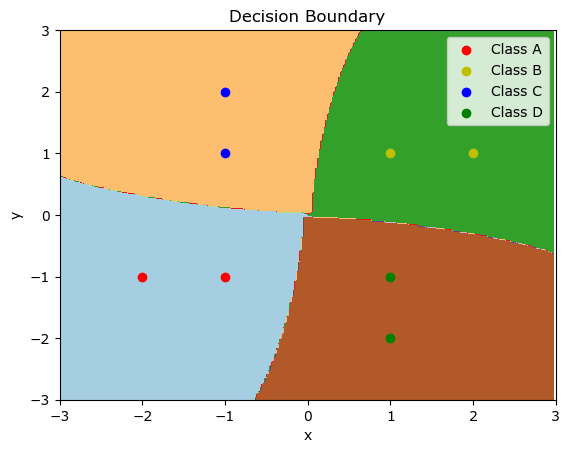

In [25]:
# 画图
plot_step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))
#对坐标风格上的点进行预测，来画分界面。其实最终看到的类的分界线就是分界面的边界线。
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

class_name = "ABCD"
plot_color = "rybg"
for i, n, c in zip(range(4), class_name, plot_colors):
    idx = np.where(y == i) # i为0或者1, 两个类
    plt.scatter(X[idx, 0], X[idx, 1],
               c=c, cmap=plt.cm.Paired,
               label = "Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Decision Boundary")
plt.show()